In [1]:
import numpy as np
#import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (10,10)

Populating the interactive namespace from numpy and matplotlib


## Question 1

In [3]:
################
# Question 1
################
reward1 = np.zeros((10,10))
reward1[9,9] = 1

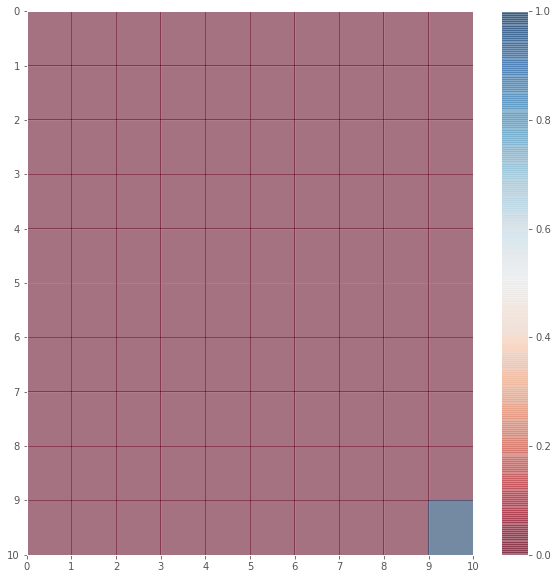

In [4]:
fig = plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.pcolor(reward1, cmap = "RdBu", alpha = 0.5)
plt.colorbar()
plt.grid()
plt.show()

In [5]:
reward2 = np.zeros((10,10))
reward2[1:7,4] = -100
reward2[3:8,8] = -100
reward2[1,5] = -100
reward2[1:4,6] = -100
reward2[7:9,6] = -100
reward2[3,7] = -100
reward2[7,7] = -100
reward2[9,9] = 10

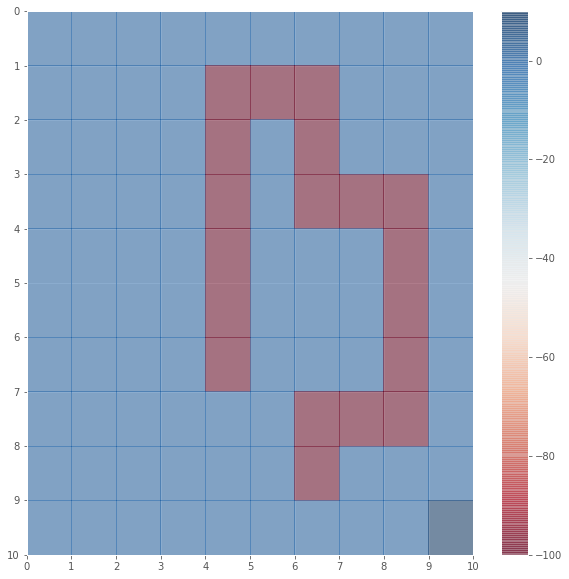

In [6]:
fig = plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.pcolor(reward2, cmap = "RdBu", alpha = 0.5)
plt.colorbar()
plt.grid()
plt.show()

## Question 2 - 9

In [10]:
class MDP():
    
    def __init__(self, V=None, delta=None, epsilon=None, gamma=None,
                  w=None, reward=None, action=None) :
        self.V = V # V is reward matrix 
        self.delta = None
        self.epsilon = epsilon
        self.gamma = gamma
        self.w = w
        self.reward = reward
        self.action = None
        self.updated = 0
        
    def value_clac(self, x, y, actions):
        [m,n] = self.reward.shape
        if(actions == "up"):
            p1 = 1 - 0.75 * self.w # up
            p2 = 0.25 * self.w # left
            p3 = 0.25 * self.w # right
            p4 = 0.25 * self.w # down
        if(actions == "down"):
            p1 = 0.25 * self.w
            p2 = 0.25 * self.w
            p3 = 0.25 * self.w
            p4 = 1 - 0.75 * self.w
        if(actions == "left"):
            p1 = 0.25 * self.w
            p2 = 1 - 0.75 * self.w
            p3 = 0.25 * self.w
            p4 = 0.25 * self.w
        if(actions == "right"):
            p1 = 0.25 * self.w
            p2 = 0.25 * self.w
            p3 = 1 - 0.75 * self.w
            p4 = 0.25 * self.w
        
        step_award = p1 * (self.reward[max(x-1,0),y] + self.gamma * self.V[max(x-1,0),y]) \
                   + p2 * (self.reward[x,max(y-1,0)] + self.gamma * self.V[x,max(y-1,0)])\
                   + p3 * (self.reward[x,min(y+1,n-1)] + self.gamma * self.V[x,min(y+1,n-1)])\
                   + p4 * (self.reward[min(x+1,m-1),y] + self.gamma * self.V[min(x+1,m-1),y])
        return(step_award)
    
    def look_forward(self, x, y):
        ind_x = x
        #print(x)
        ind_y = y
        #print(y)
        v_up = self.value_clac(x=ind_x, y=ind_y, actions="up")
        v_dn = self.value_clac(x=ind_x, y=ind_y, actions="down")
        v_lft = self.value_clac(x=ind_x, y=ind_y, actions="left")
        v_rt = self.value_clac(x=ind_x, y=ind_y, actions="right")
        
            
        #tmp = [v_up, v_dn, v_lft, v_rt]
        tmp = [v_rt, v_up, v_lft, v_dn]
        #print(tmp)
        max_tmp = max(tmp)
        #ind = [i for i, j in enumerate(tmp) if j == max_tmp]
        ind = tmp.index(max(tmp))
        return(max_tmp, ind)
    
    def update(self):
        if self.reward == None:
            raise Exception("Initialize reward function!")
        else:
            [m,n] = self.reward.shape
            self.V = np.zeros((10,10))
            self.delta = 1e20 # shuld be a very large number
            
            self.action = np.zeros((10,10)) # action matrix
            
            print("Runnning Value iteration algorithm ... ")
            iterations = 0
            while self.delta > self.epsilon:
                self.delta = 0
                iterations = iterations + 1
                for i in np.arange(0,m):
                    for j in np.arange(0,n):
                        v = self.V[i,j]
                        update_value, opt_action = self.look_forward(x=i,y=j)
                        self.V[i,j] = update_value
                        self.action[i,j] = opt_action
                        self.delta = max(self.delta, np.abs(update_value - v))
                
                if (iterations % 10 == 0):
                    print(iterations)
                    print("delta = {}".format(self.delta))
            
            print("Optimum delta = {}".format(self.delta))
            print("Done!")
    
    def plot_action(self):
        #
        [m,n] = self.reward.shape
        X = np.arange(0.5, m, 1)
        Y = np.arange(0.5, n, 1)
        U = np.cos(self.action * np.pi / 2)
        V = np.sin(self.action * np.pi / 2)
        
        plt.figure()
        ax = plt.gca()
        ax.invert_yaxis()
        ax.set_xticks(np.arange(0, 11, 1))
        ax.set_yticks(np.arange(0, 11, 1))
        plt.title("Actions")
        plt.pcolor(self.reward, alpha=0.5,cmap = "RdBu")
        plt.colorbar()
        plt.quiver(X, Y, U, V, units='x',pivot='mid')
        plt.grid()
        plt.show()
    
    def plot_value(self):
        fig = plt.figure()
        ax = plt.gca()
        ax.invert_yaxis()
        ax.set_xticks(np.arange(0, 11, 1))
        ax.set_yticks(np.arange(0, 11, 1))
        heatmap = plt.pcolor(self.V, cmap = "RdBu")
        for y in range(self.V.shape[0]):
            for x in range(self.V.shape[1]):
                plt.text(x + 0.5, y + 0.5, '%.3f' % self.V[y, x],
                         horizontalalignment='center',
                         verticalalignment='center',
                         fontsize=10,
                         color='white'
                         )
        plt.colorbar(heatmap)
        plt.grid()
        plt.show()

C:\Users\kgicmd\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Runnning Value iteration algorithm ... 
10
delta = 0.12052571187470829
20
delta = 0.01200068146059638
Optimum delta = 0.009542522841845001
Done!


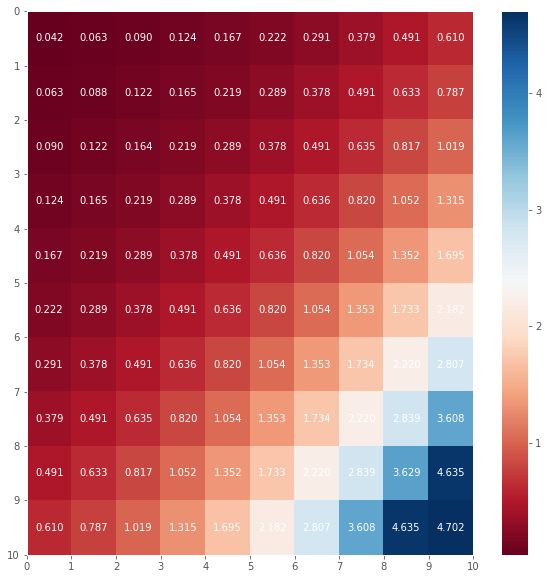

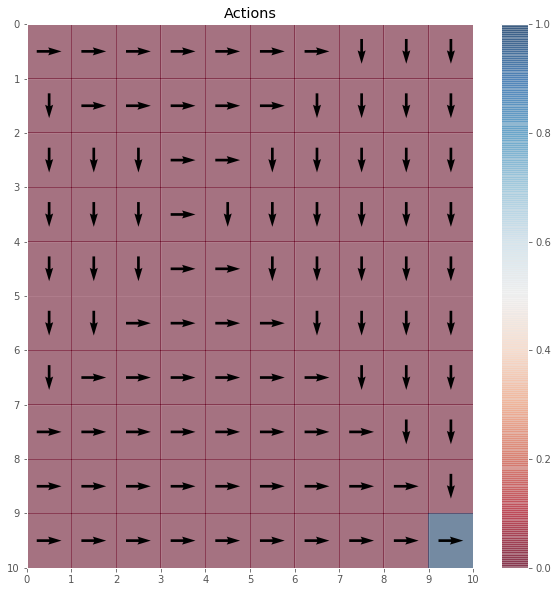

In [11]:
# reward 1
mdp_process = MDP()
mdp_process.reward = reward1
mdp_process.delta = 1e10 # should be a very large number
mdp_process.epsilon = 0.01
mdp_process.gamma = 0.8
mdp_process.w = 0.1

mdp_process.update()

mdp_process.plot_value()
mdp_process.plot_action()

C:\Users\kgicmd\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Runnning Value iteration algorithm ... 
10
delta = 1.2048120096708175
20
delta = 0.12005715637385583
30
delta = 0.011861775462376434
Optimum delta = 0.009390572496691174
Done!


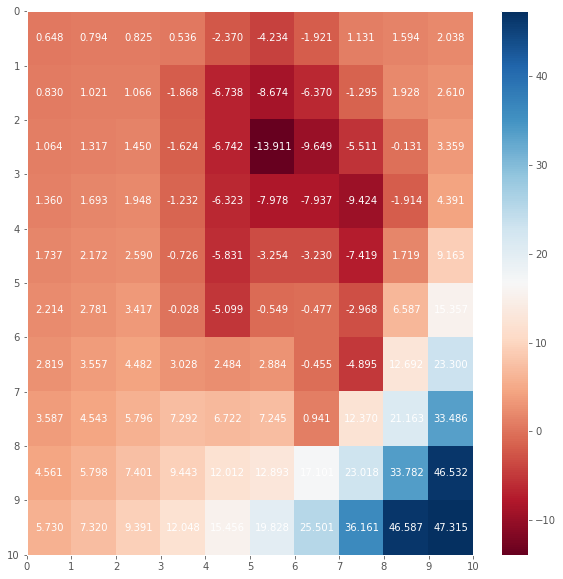

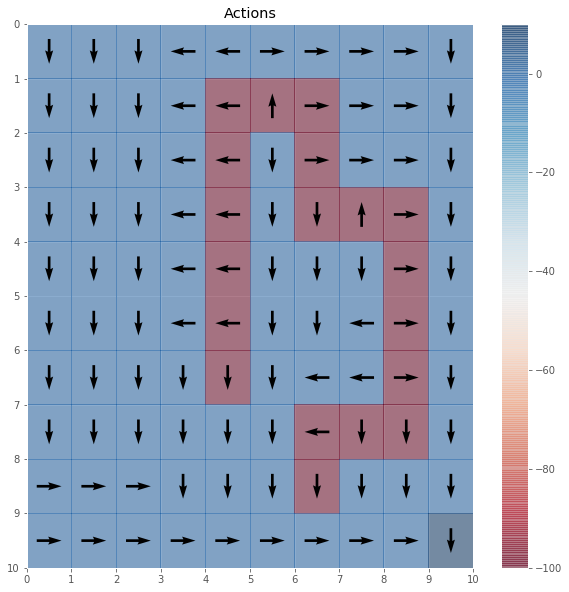

In [12]:
# reward2
mdp_process2 = MDP()
mdp_process2.reward = reward2
mdp_process2.delta = 1e10 # should be a very large number
mdp_process2.epsilon = 0.01
mdp_process2.gamma = 0.8
mdp_process2.w = 0.1

mdp_process2.update()

mdp_process2.plot_value()
mdp_process2.plot_action()